# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
# data["plot"] = True

# data['min_llema_angle'] = 1

# data['pl_move_trail_trigger']       = 0.0040
# data['stop_loss_pip']               = -0.0040

# data['take_profit_method']  = 'simple'
# data['stop_loss_method']    = 'simple'

# data['start_date'] = {'year':2021, 'month':1, 'date':1}
# data['end_date']   = {'year':2021, 'month':1, 'date':5}

In [3]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

 95%|███████████████████████████▍ | 1252282/1324436 [01:03<00:03, 19308.18it/s]

pls    0.00446
dtype: float64
--------------------------------------
                  date ord_types               close_type      pls
0  2021-05-04 07:40:13     short       simple_take_profit  0.00300
1  2021-05-11 08:18:37     short  simple_slema_move_close  0.00002
2  2021-05-12 03:49:28     short       simple_take_profit  0.00300
3  2021-05-12 13:29:52     short       simple_take_profit  0.00301
4  2021-05-13 13:53:59     short              simple_stop -0.00300
5  2021-05-14 06:28:08     short              simple_stop -0.00301
6  2021-05-19 18:07:13     short       simple_take_profit  0.00300
7  2021-05-20 14:02:17     short              simple_stop -0.00302
8  2021-05-24 00:28:47     short  simple_slema_move_close  0.00043
9  2021-05-24 09:59:51     short              simple_stop -0.00301
10 2021-05-26 15:16:01     short       simple_take_profit  0.00300
11 2021-05-28 10:58:40     short  simple_slema_move_close  0.00104


100%|█████████████████████████████| 1324436/1324436 [01:07<00:00, 19643.10it/s]

Wall time: 1min 41s


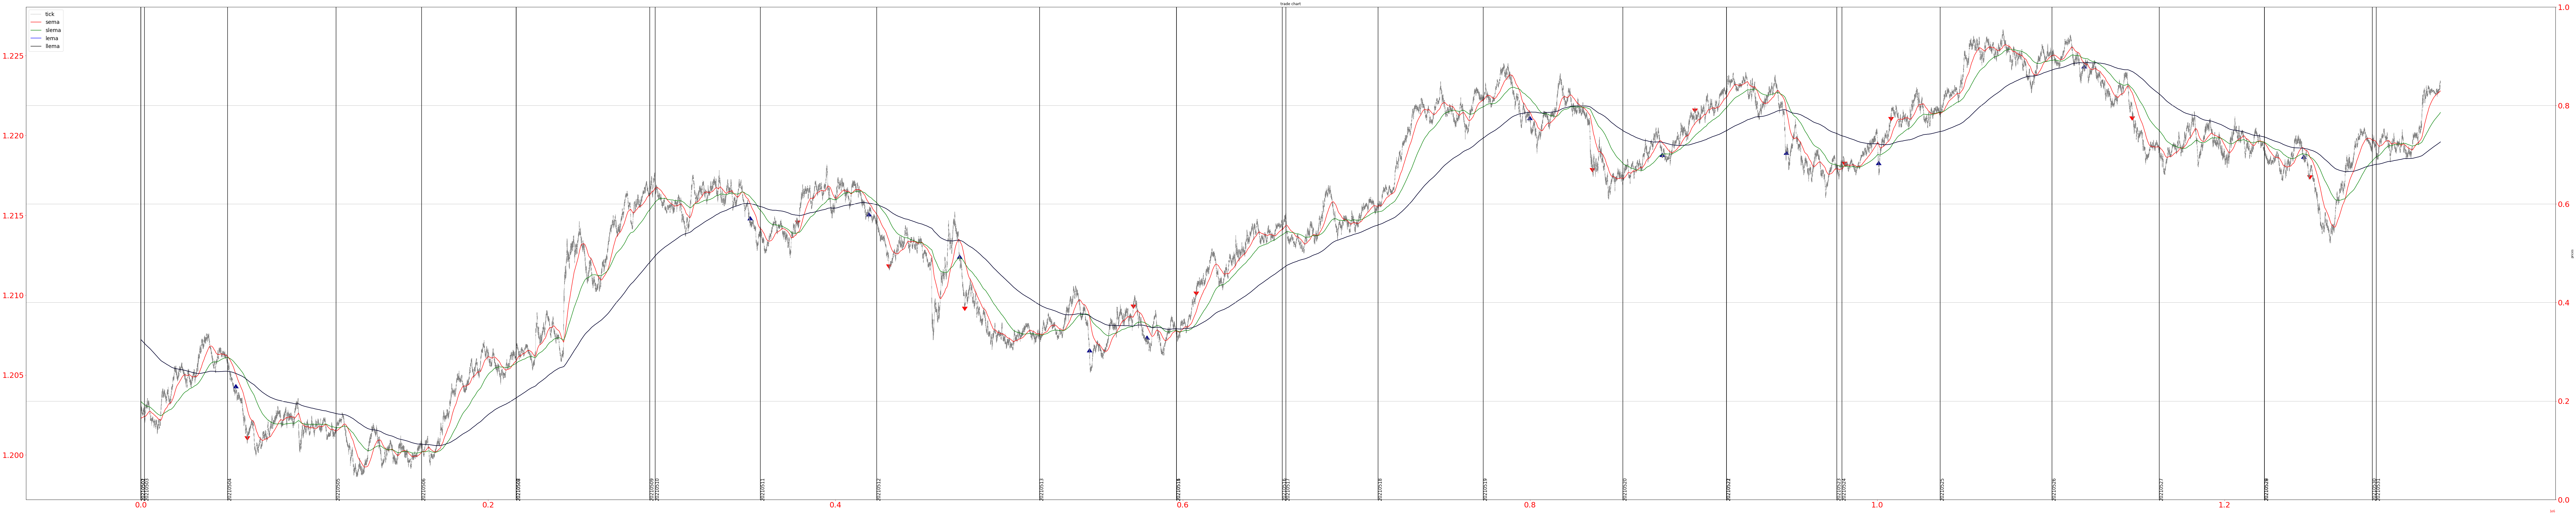

-----------------------------------------------------
date_val          : ['20210501', '20210502', '20210503', '20210504', '20210505', '20210506', '20210507', '20210508', '20210509', '20210510', '20210511', '20210512', '20210513', '20210514', '20210515', '20210516', '20210517', '20210518', '20210519', '20210520', '20210521', '20210522', '20210523', '20210524', '20210525', '20210526', '20210527', '20210528', '20210529', '20210530', '20210531']
Total PL : 0.004459999999999999
-------------
net_pl            : 0.00446/0.02854
-------------
+ve               : num= 8    sum= +0.0165    avg= +0.00206
-ve               : num= 4    sum= -0.01204    avg= -0.00301
-----------------------------------------------------
month_val
5    0.00446
Name: pls, dtype: float64
-----------------------------------------------------
simple_take_profit         5
simple_stop                4
simple_slema_move_close    3
Name: close_type, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

In [5]:
data["df_llema_list"]

[]

In [6]:
len(data["df_lema_list"])

1324436

In [7]:
data["df"]['slema'] = data["df_slema_list"][-data['df_len']:]

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')